In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
df.shape

(2087, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
df.duplicated().sum()

24

In [6]:
# removing the duplicates from our dataset
df.drop_duplicates(inplace =True)

In [24]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64

In [18]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'object']
num_features = [feature for feature in df.columns if df[feature].dtype != 'object']

In [17]:
cat_features

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [19]:
num_features

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [23]:
df[num_features].describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# EDA

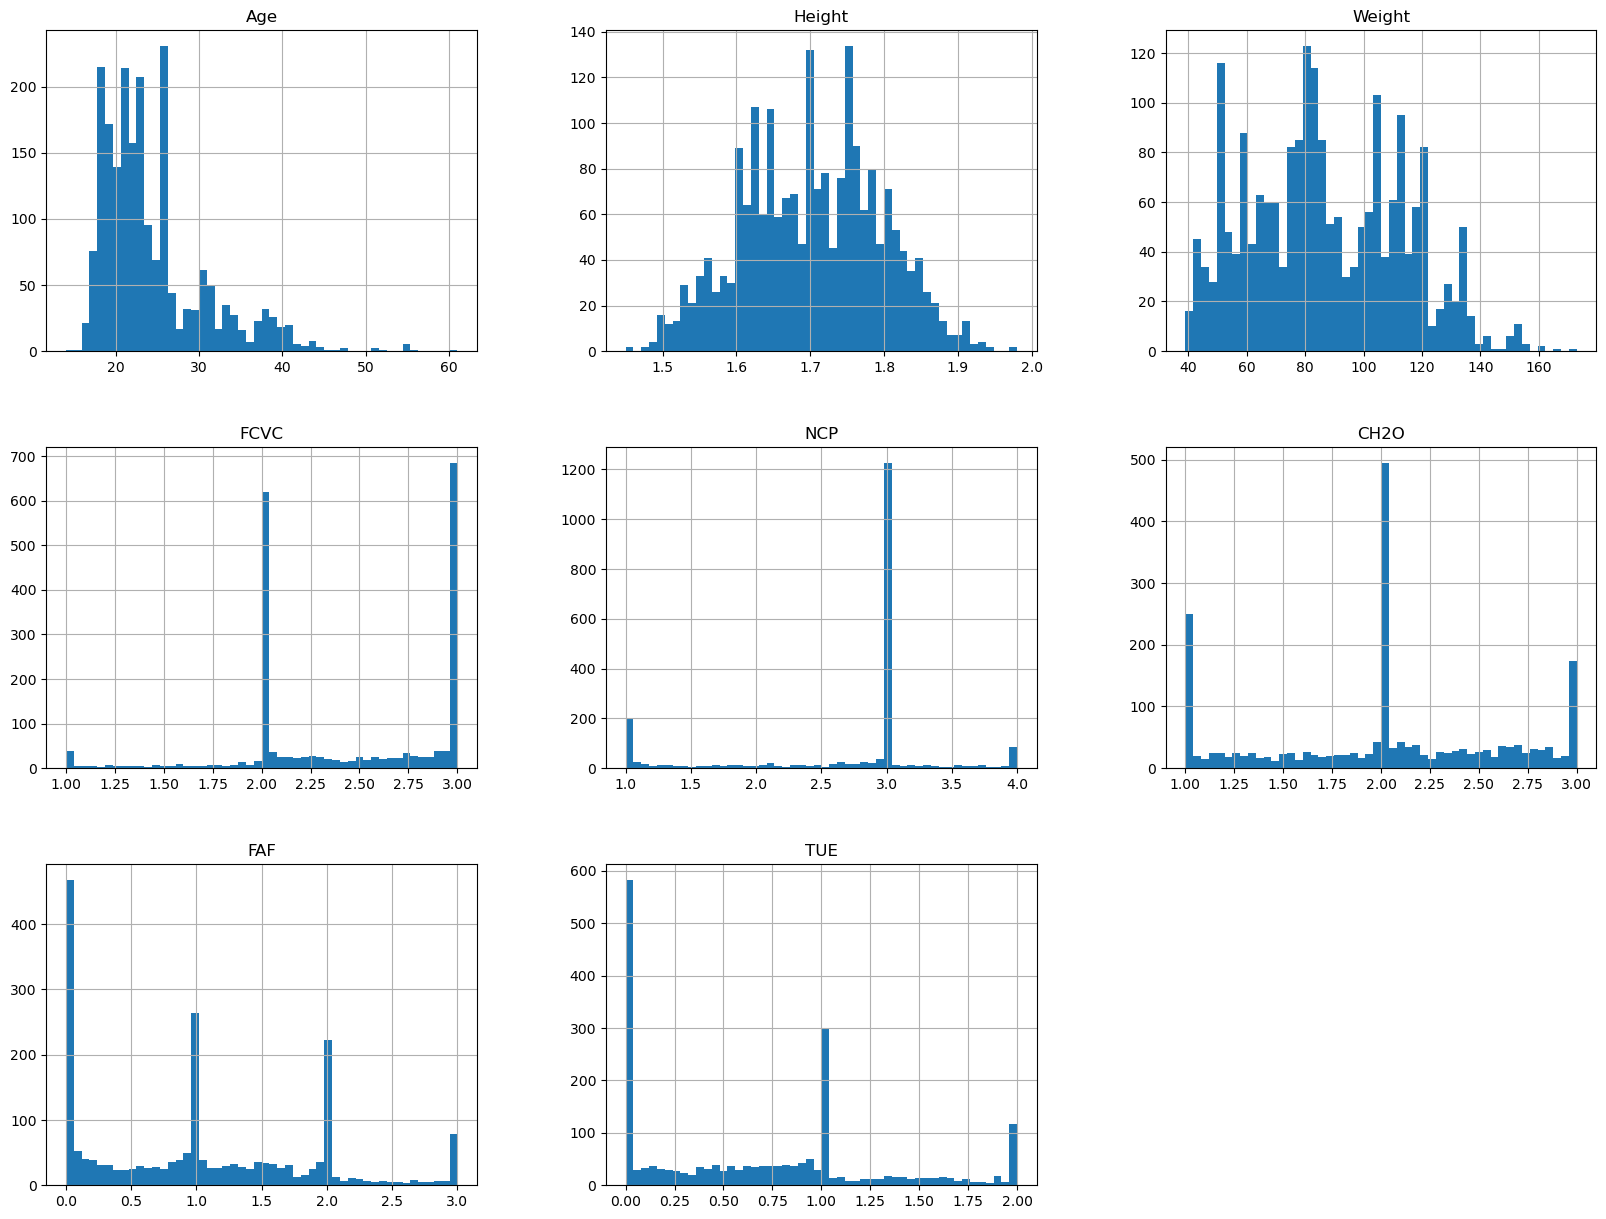

In [26]:
import matplotlib.pyplot as plt
df[num_features].hist(bins=50, figsize=(20,15))
plt.show()

In [27]:
cat_features

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

<Axes: xlabel='NObeyesdad', ylabel='count'>

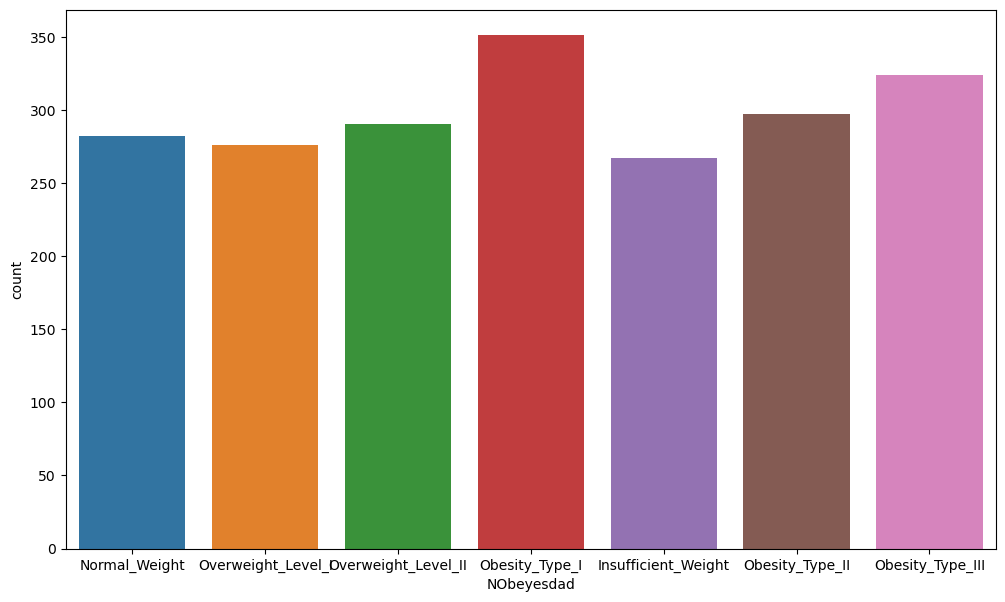

In [31]:
plt.figure(figsize = (12,7))
sns.countplot(x='NObeyesdad',data=df)

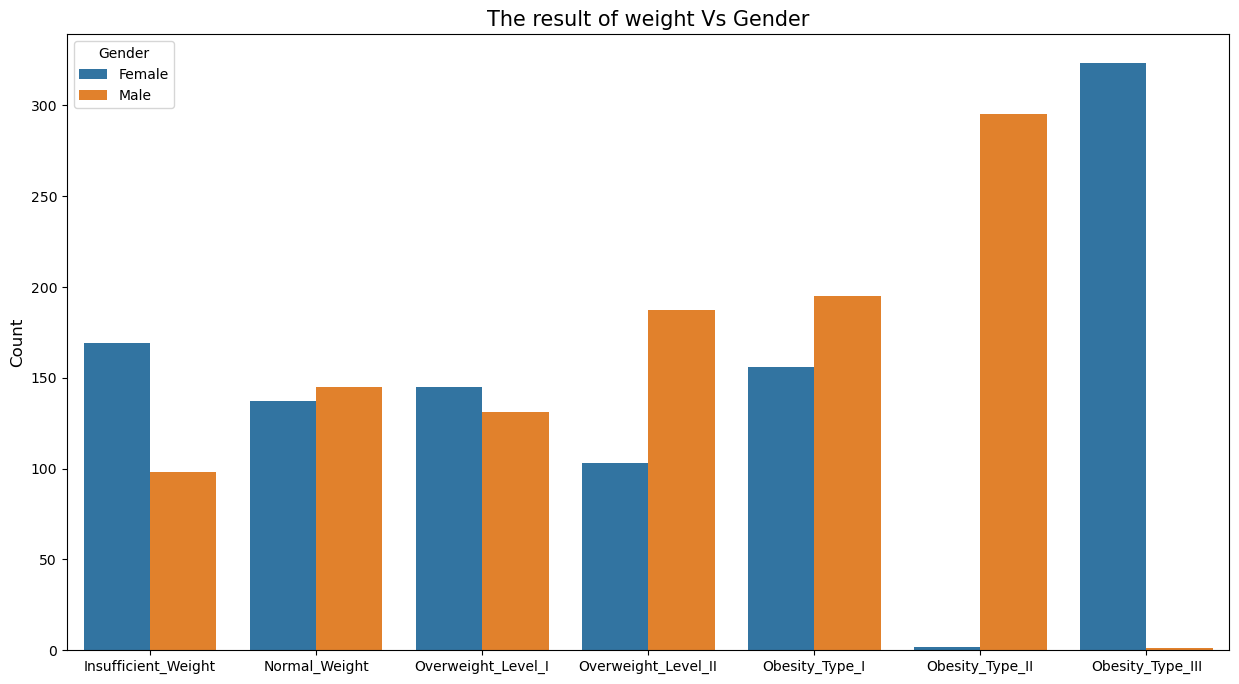

In [32]:
# lets check relation of target feature with other features
plt.figure(figsize=(15,8))
sns.countplot(x='NObeyesdad',data=df,hue='Gender',order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.ylabel('Count',fontsize=12)
plt.xlabel(None)
plt.title('The result of weight Vs Gender',fontsize=15)
plt.show()

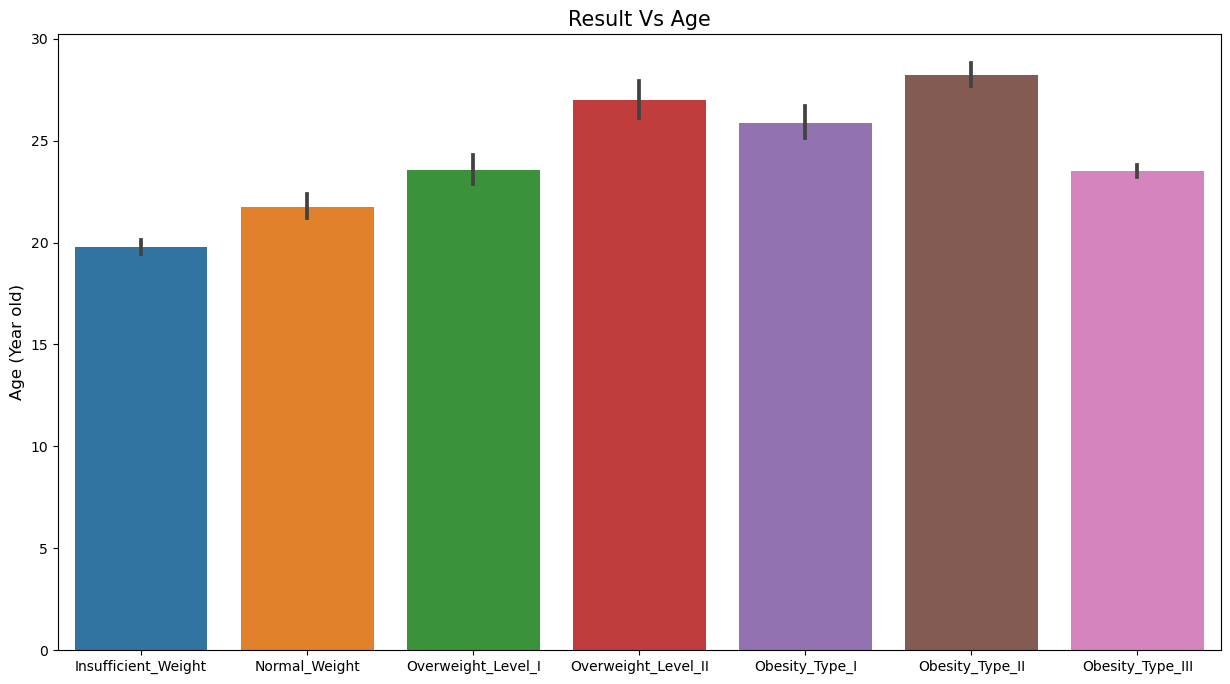

In [33]:
plt.figure(figsize=(15,8))
sns.barplot(x='NObeyesdad',y='Age',data=df,order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.title('Result Vs Age',fontsize=15)
plt.ylabel('Age (Year old)',fontsize=12)
plt.xlabel(None)
plt.show()

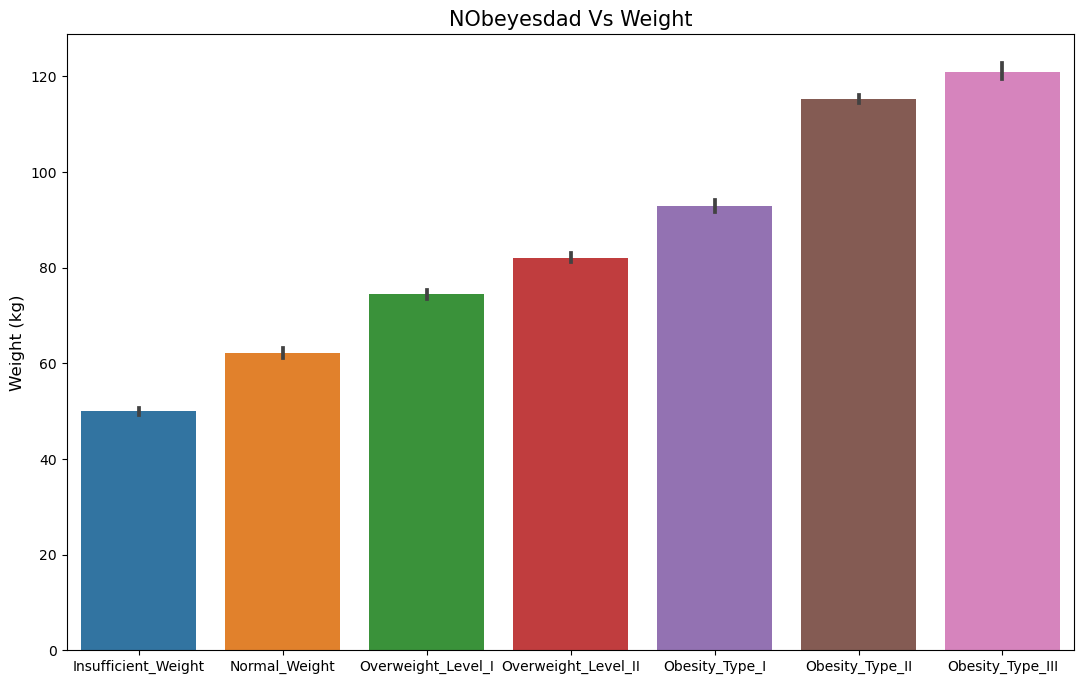

In [34]:
plt.figure(figsize=(13,8))
sns.barplot(x='NObeyesdad',y='Weight',data=df,
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Weight (kg)',fontsize=12)
plt.title('NObeyesdad Vs Weight',fontsize=15)
plt.show()

<Axes: >

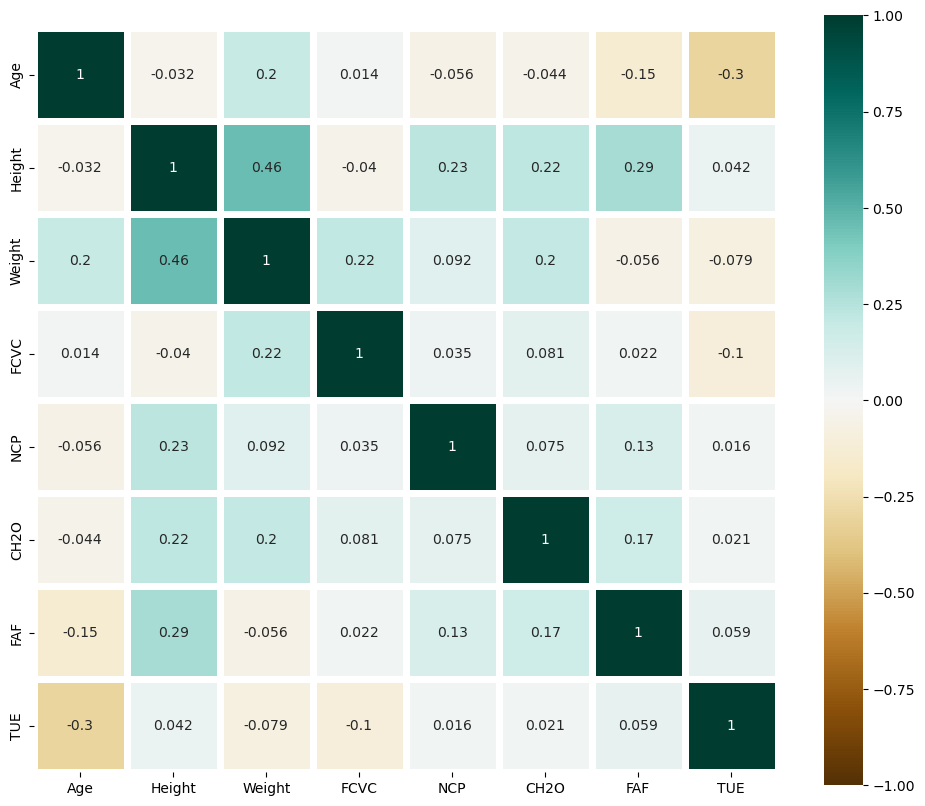

In [37]:
plt.figure(figsize=(12,10))
sns.heatmap(df[num_features].corr(),annot=True,square=True,center=0,vmin=-1,vmax=1,
            cmap='BrBG',linewidths=5)

In [40]:
labels = df['NObeyesdad'].values.reshape(-1)
print(labels)

['Normal_Weight' 'Normal_Weight' 'Normal_Weight' ... 'Obesity_Type_III'
 'Obesity_Type_III' 'Obesity_Type_III']


In [41]:
target = df.drop('NObeyesdad', axis = 1)
target

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [48]:
from sklearn.preprocessing import LabelEncoder


In [49]:
data = df.copy()

feature = data.drop('NObeyesdad',axis=1)
target = data['NObeyesdad'].values.reshape(-1)

le = LabelEncoder()
for column_name in feature.columns:
    if feature[column_name].dtype == object:
        feature[column_name] = le.fit_transform(feature[column_name])
    else:
        pass

target = le.fit_transform(target)

In [50]:
feature

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3


In [52]:
target

array([1, 1, 1, ..., 4, 4, 4])

## splitting the dataset

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(feature, target, test_size =0.2, random_state = 42)

### According to task we are supposed to use four models 

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

 # Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
logistic_regression = LogisticRegression()

In [59]:
logistic_regression.fit(X_train, y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
y_pred.shape

(418,)

In [65]:
y_test.shape

(418,)

In [66]:
## checking the testing score
y_pred = logistic_regression.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

In [67]:
test_accuracy

0.6363636363636364

In [68]:
confusion_matrix(y_test, y_pred)

array([[48, 10,  0,  0,  0,  1,  0],
       [17, 26,  6,  2,  0,  9,  1],
       [ 0,  0, 41,  6,  6, 10,  7],
       [ 0,  0,  9, 51,  0,  0,  4],
       [ 0,  0,  0,  0, 60,  0,  0],
       [ 0,  8,  5,  3,  0, 25, 14],
       [ 0,  8, 14,  1,  0, 11, 15]], dtype=int64)

In [69]:
## since the accuracy is not quite good lets perform hyper parameter tuning for this model
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)

In [72]:
grid_search.fit(X_train, y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anacond

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [74]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [75]:
logistic_regression = LogisticRegression(C=10, penalty='l1', solver='liblinear')
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [76]:
## checking the testing score
y_pred = logistic_regression.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

In [77]:
test_accuracy

0.7799043062200957

 as we can see our model is now performing better than before

# Support Vector Classifier

In [79]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.5885167464114832

In [80]:
# hyper parameter tuning for svc
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10.0], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [81]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 10.0, 'gamma': 'scale', 'kernel': 'linear'}


In [82]:
svc = SVC(C =10.0, gamma= 'scale', kernel = 'linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.9545454545454546

# Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [84]:
y_pred = decision_tree.predict(X_test)

In [85]:
accuracy_score(y_test, y_pred)

0.9138755980861244

Decision Tree performed excellent

# Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier
rdc =  RandomForestClassifier()
rdc.fit(X_train, y_train)

RandomForestClassifier()

In [87]:
y_pred = rdc.predict(X_test)

In [88]:
accuracy_score(y_test, y_pred)

0.9569377990430622